In [254]:
# We use 'Numpy'for mathematical operations on large, multi-dimensional arrays and matrices
# 'Pandas' is used for data manipulation and analysis
import numpy as np
import pandas as pd 

# To check the data type we import 'is_string_dtype' and 'is_numeric_dtype'
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# 'Matplotlib' is a data visualization library for 2D and 3D plots
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn is used for plotting statistical graphics
import seaborn as sns

#  To build and analyze various statistical models we use 'Statsmodels'
import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

# To perform scientific computations
from scipy.stats import shapiro
from scipy import stats

In [3]:
# suppress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# 15 and 8 are width and height in inches respectively
plt.rcParams['figure.figsize'] = [15,8]

In [389]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = 50

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

In [246]:
df_property = pd.read_csv(r"D:\J.Bhanu Lectures\InClassFiles\Project 1\LR Project - Property Price Prediction\Dataset\HousePrices.csv")
df_property.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_property.shape

(1460, 81)

In [8]:
df_property.isnull().sum().sum()

6965

In [7]:
df_property.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExpo

In [247]:
# Converting the below variables into object datatype
# Dwell_Type               int64
# OverallQual              int64
# OverallCond              int64

df_property["Dwell_Type"] = df_property["Dwell_Type"].astype("O")
df_property["OverallQual"] = df_property["OverallQual"].astype("O")
df_property["OverallCond"] = df_property["OverallCond"].astype("O")

In [248]:
df_property[["Dwell_Type","OverallQual","OverallCond"]].dtypes

Dwell_Type     object
OverallQual    object
OverallCond    object
dtype: object

In [25]:
df_property.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
df_property.drop(['Id'], axis=1, inplace=True)

In [33]:
df_property.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
# to get the summary for the numerical features :

df_property.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
# to get the summary for the categorical vairables :

df_property.describe(include = object)

,Dwell_Type,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,9,8,5,8,10,9,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,397,821,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [28]:
df_property.Dwell_Type.value_counts().count()

15

In [30]:
df_property = df_property.drop(["PoolQC","PoolArea"], axis=1)

In [34]:
df_property.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
df_property.shape

(1460, 78)

In [19]:
# now check the numerical only variable in dataframe available

df_num_features = df_property.select_dtypes(include=np.number)

df_num_features.columns 

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

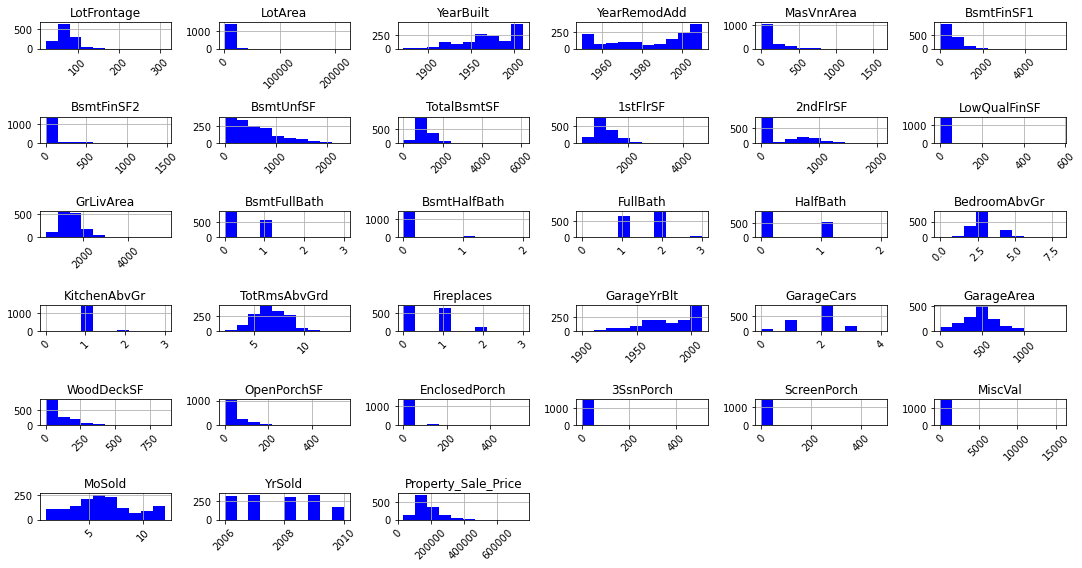

In [36]:
# plot a hist graph for all numerical variables

df_num_features.hist(xrot = 45, color="b")

plt.tight_layout()

plt.show() 

Text(0.5, 1.0, 'Frequency Distribution')

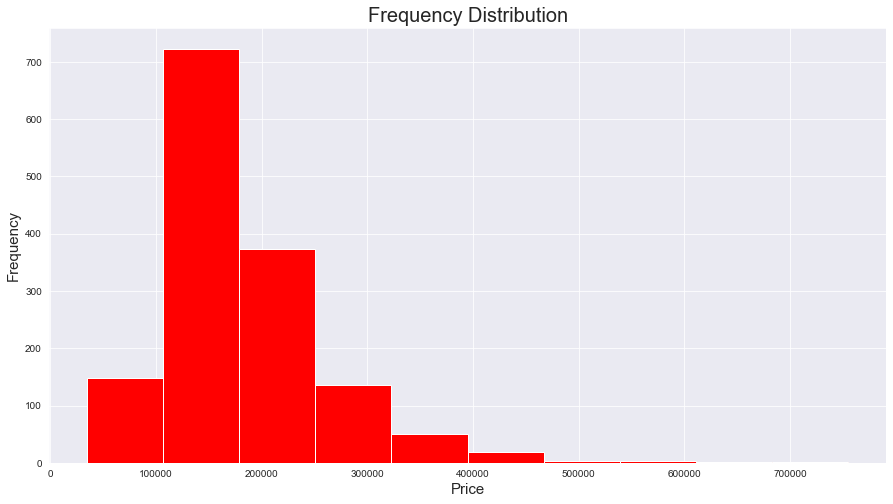

In [41]:
# Visualize the target variable

sns.set_style("dark")

df_property.hist(["Property_Sale_Price"], color="r")

plt.xlabel("Price", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Frequency Distribution", fontsize = 20)

NOW DISTRIBUTION OF CATEGORICAL VARIABLE

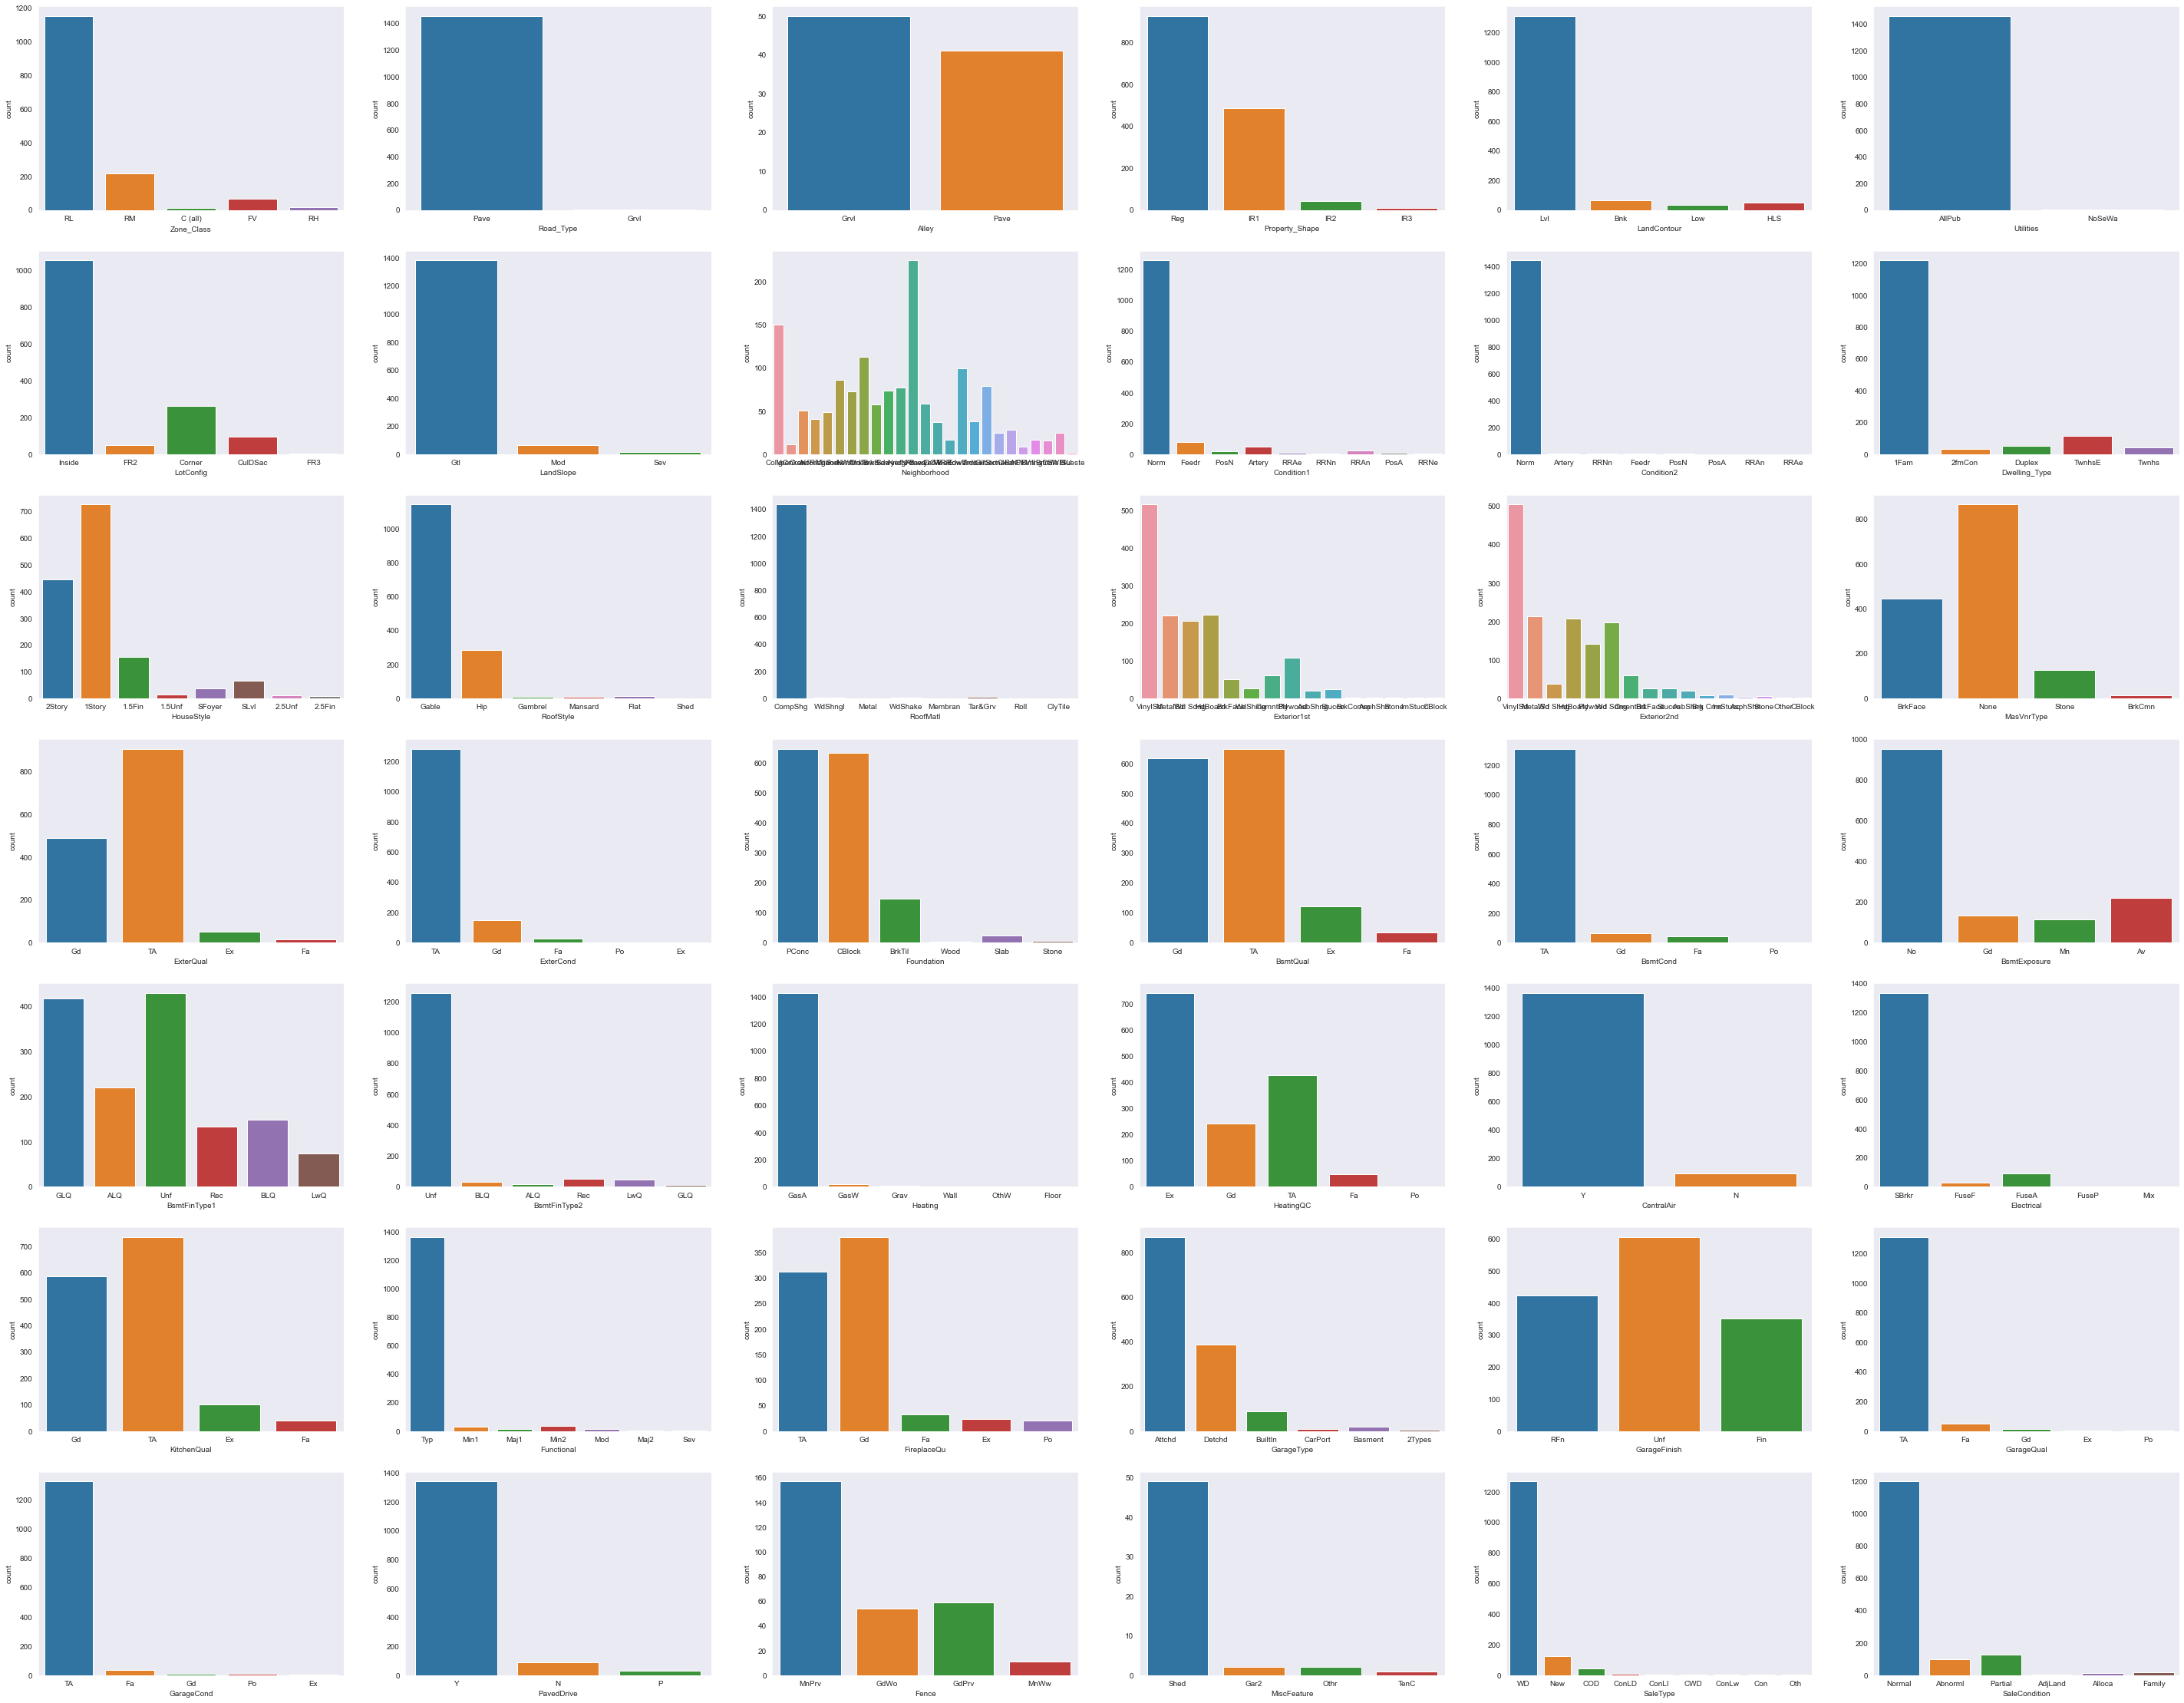

In [49]:
# create an empty list to store all the categorical variables

categorical=[]

# check the data type of each variable
for column in df_property:
    
    # check if the variable has the categorical type
    if is_string_dtype(df_property[column]):
        
        # append the categorical variables to the list 'categorical'
        categorical.append(column)

        
# plot the count plot for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(7,6, figsize=(50,40))

# # plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(categorical, ax.flatten()):
     sns.countplot(df_property[variable], ax = subplot)
    
# # display the plot
plt.show()       

In [117]:
df_property.dtypes

Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExposure            object
BsmtFinT

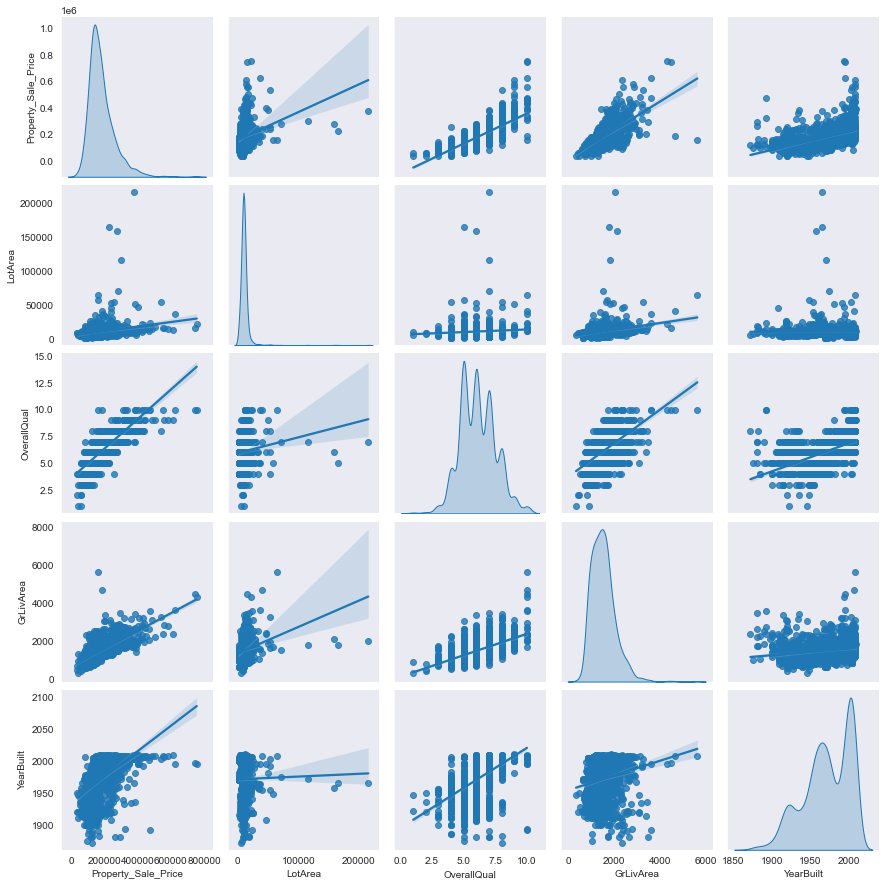

In [121]:
# DRAW A PAIR PLOT FOR NUMERICAL VARIABLES:

column = ["Property_Sale_Price","LotArea","OverallQual","GrLivArea","YearBuilt"]


sns.pairplot(df_property[column] ,kind="reg", diag_kind="kde")

Boxplot of OverallQuality and Property_Sale_Price (Bi-Variate Analysis)

Text(0.5, 1.0, 'QVERALL QUALITY VS PROPERTY_SALE_PRICE')

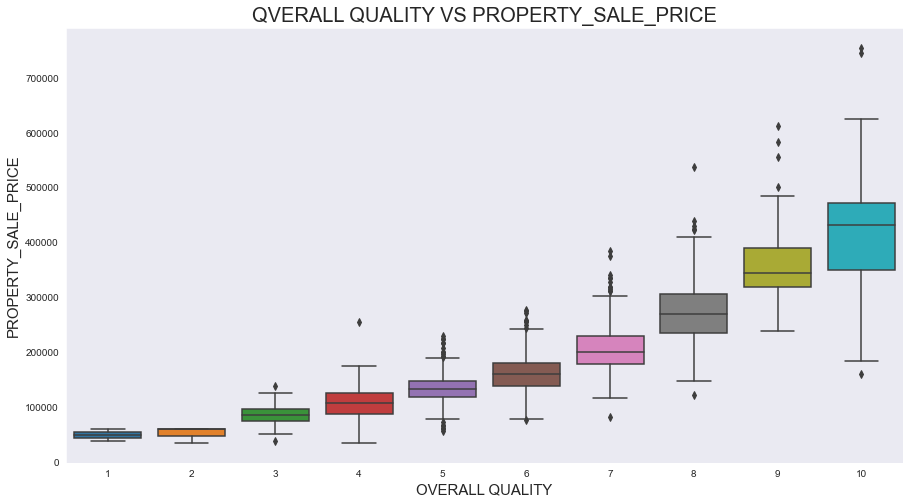

In [81]:
sns.boxplot("OverallQual","Property_Sale_Price", data=df_property)

plt.xlabel("OVERALL QUALITY", fontsize = 15)
plt.ylabel("PROPERTY_SALE_PRICE", fontsize = 15)
plt.title("QVERALL QUALITY VS PROPERTY_SALE_PRICE", fontsize=20)

In [57]:
df_property.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:xlabel='OverallCond', ylabel='Property_Sale_Price'>

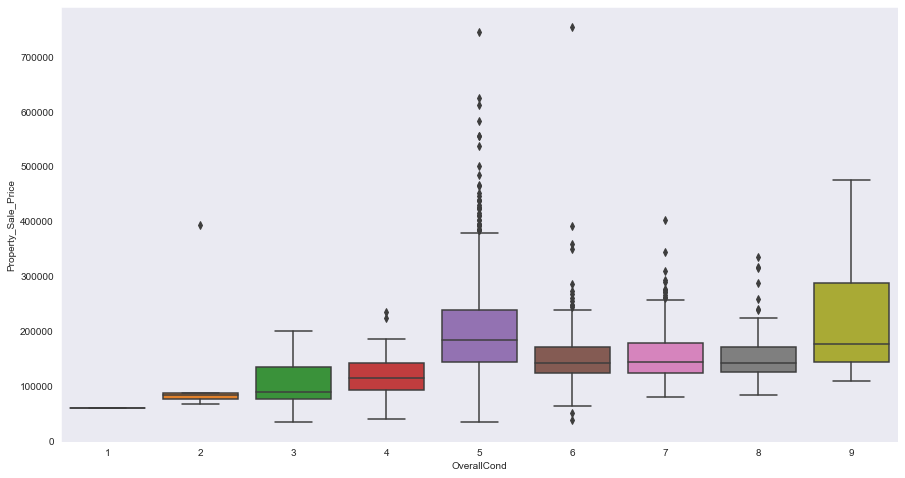

In [58]:
sns.boxplot("OverallCond","Property_Sale_Price",data=df_property )

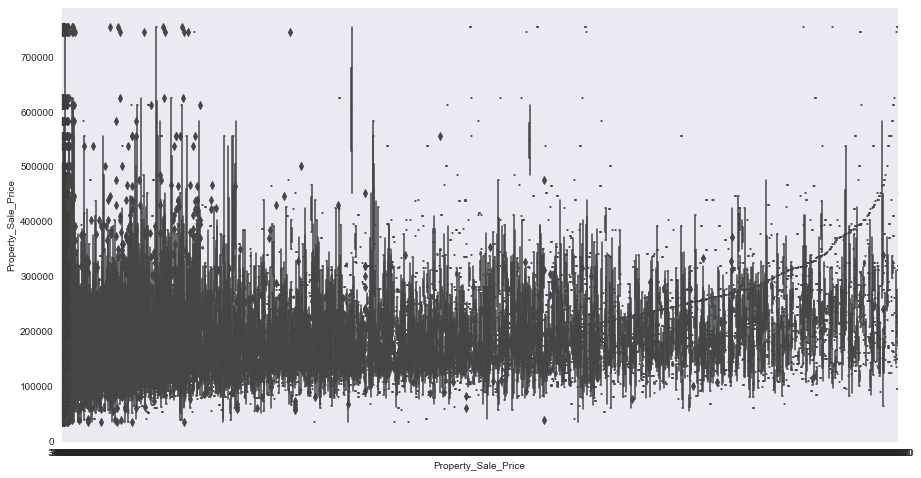

In [62]:
for variable in df_property:
    sns.boxplot(y ="Property_Sale_Price",x=i, data = df_property, dodge=True)

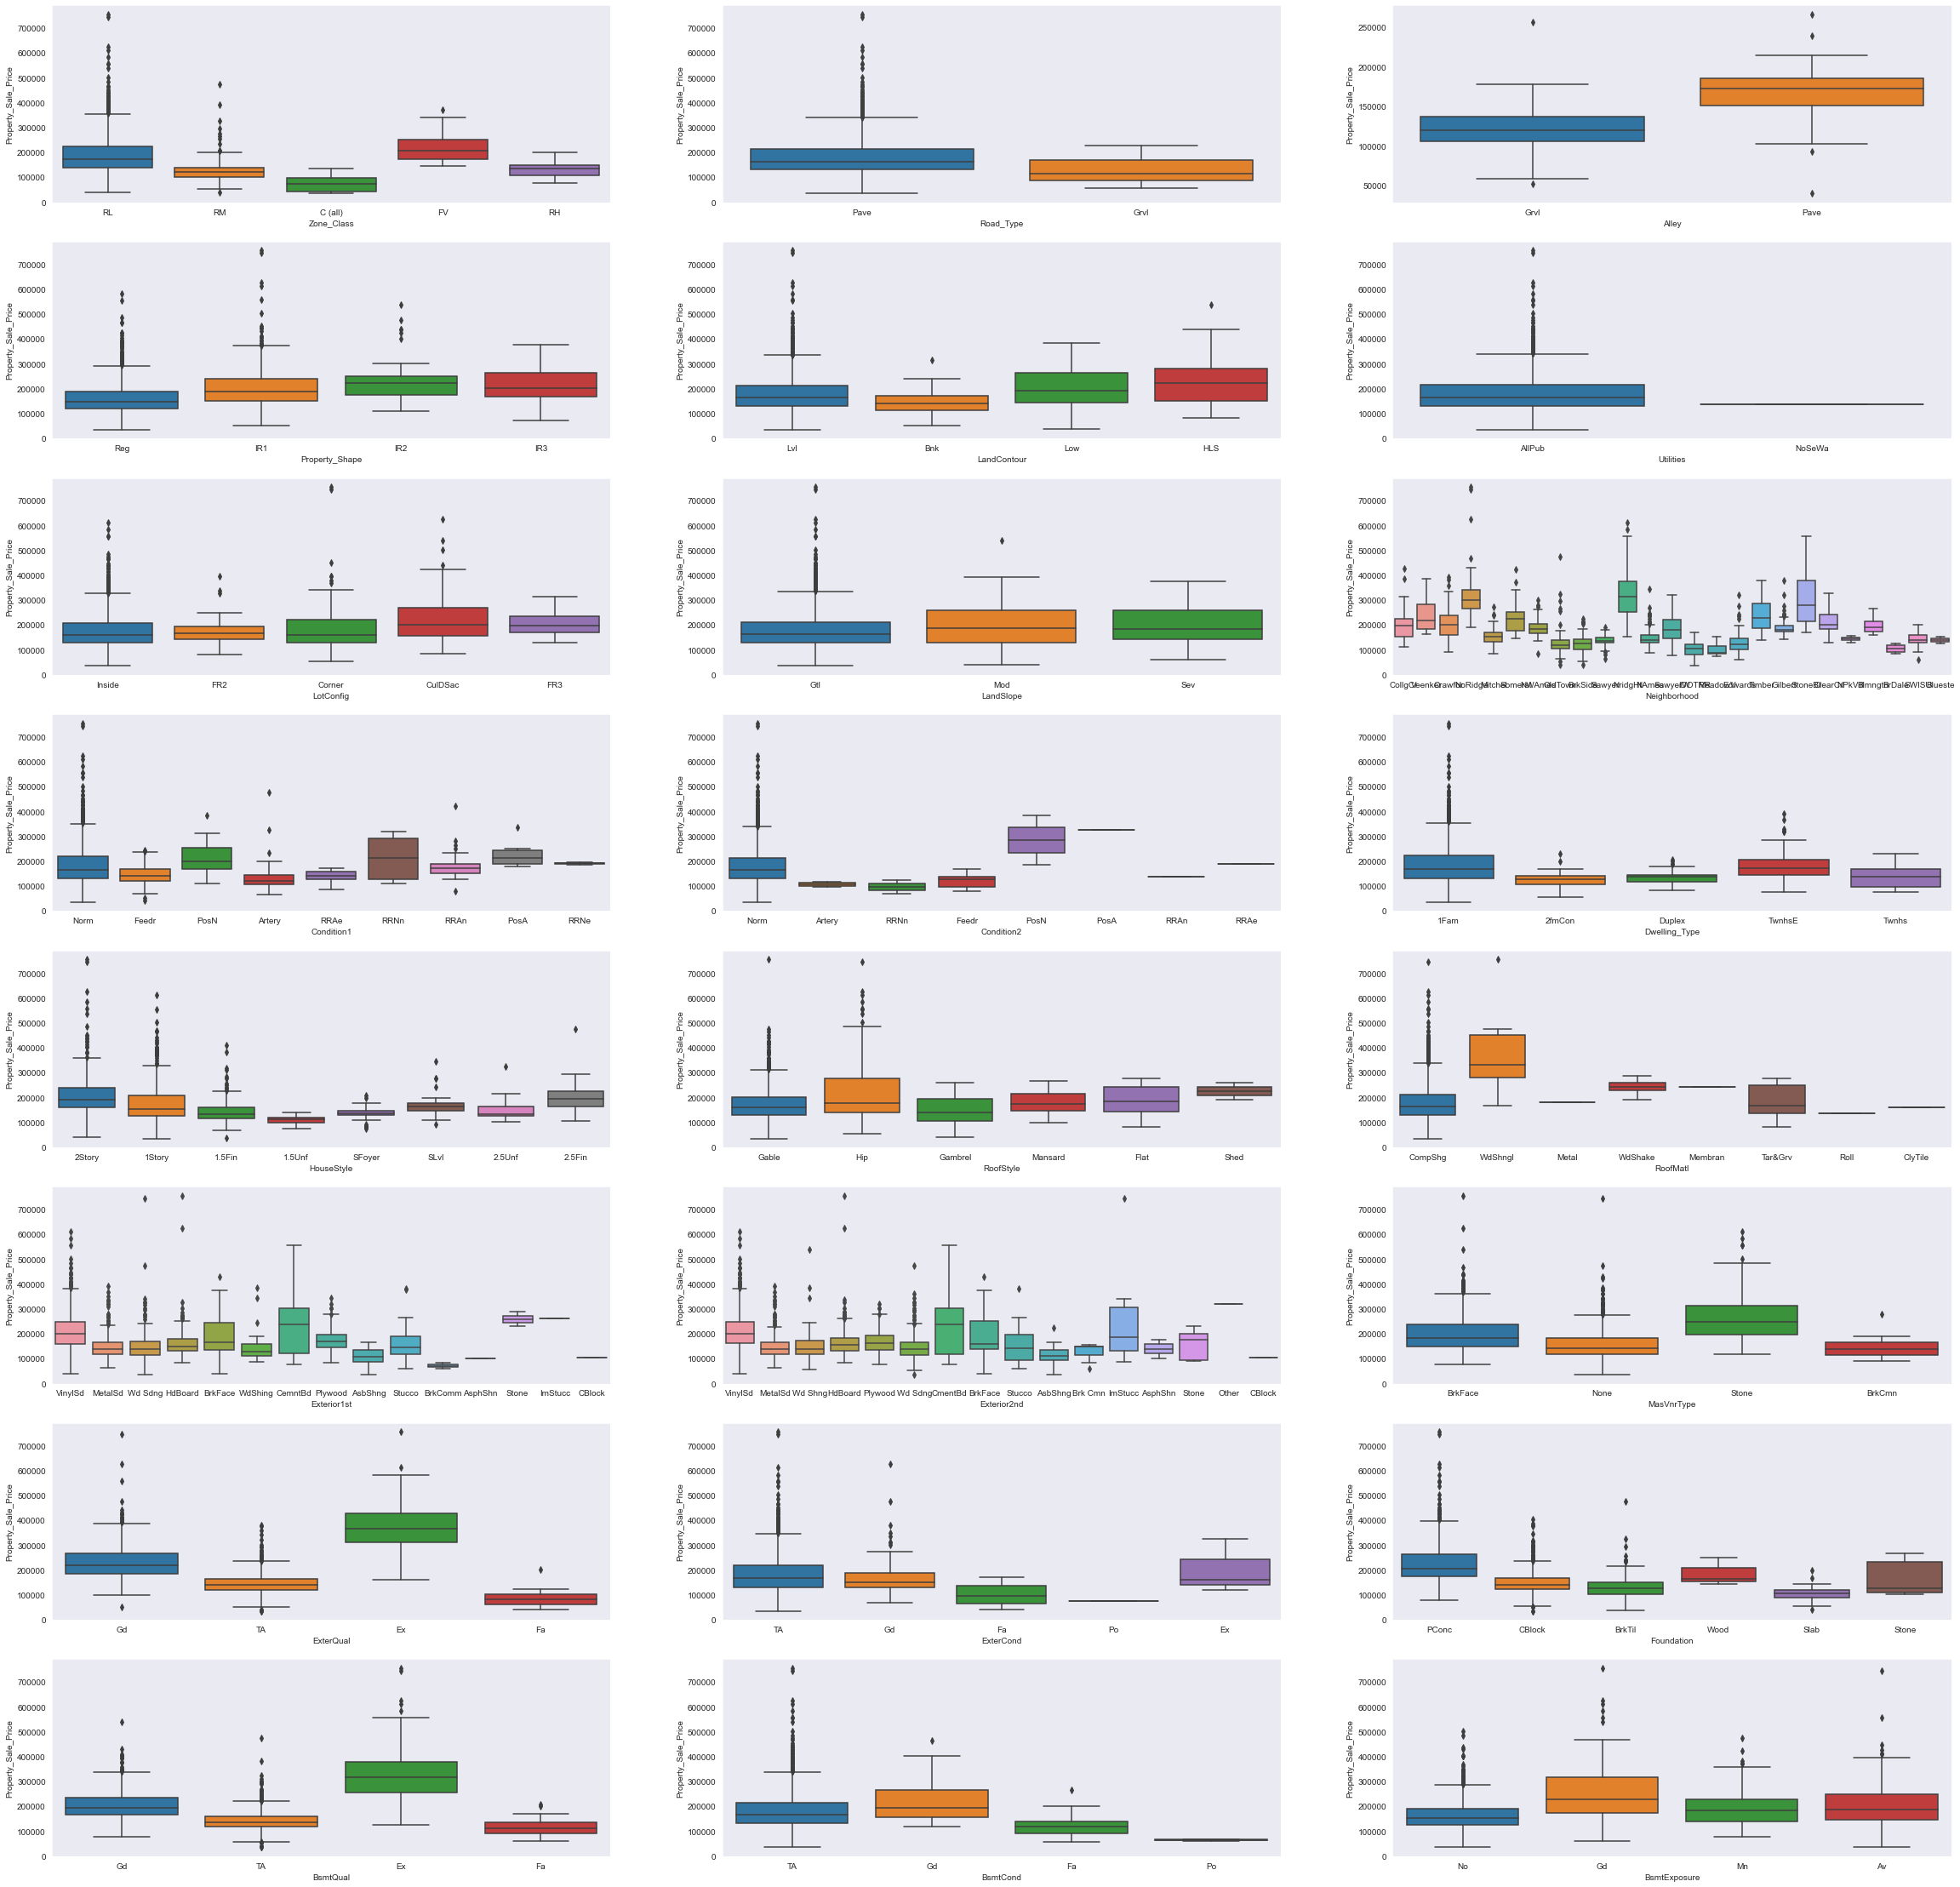

In [73]:
# Box plot for categorical variables :

categorical=[]

for variable in df_property:
    if is_string_dtype(df_property[variable]):
        categorical.append(variable)

# plot box plot for all the categories :

fig, ax = plt.subplots(8,3, figsize=(40,40))

for variables , subplot in zip(categorical, ax.flatten()):
    sns.boxplot(variables,"Property_Sale_Price", data = df_property, ax=subplot)

In [122]:
# OUTLIERS DISTRIBUTION

<AxesSubplot:xlabel='Property_Sale_Price'>

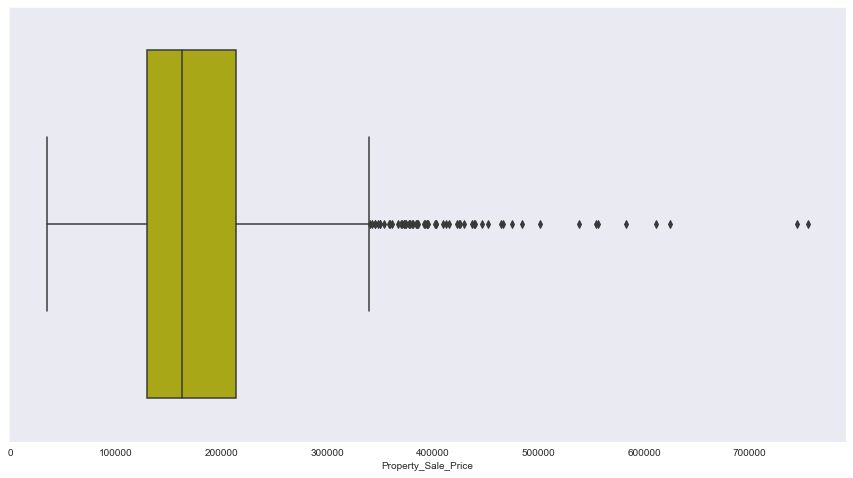

In [124]:
sns.boxplot(df_property["Property_Sale_Price"], color="y")

In [125]:
df_property.shape

(1460, 78)

In [356]:
df_property = df_property[df_property["Property_Sale_Price"]<500000]
df_property.shape

(1451, 81)

In [198]:
# Need to find the percentage of nulL values

df_property_percent_na_value =df_property.isna().mean().round(2)*100
df_property_percent_na_sum = df_property.isna().sum()


In [202]:
df_property_null_percent = pd.concat([df_property.isna().sum(),df_property_percent_na_value], axis=1,keys=["Count","Percent_Missing_Value"])
df_property_null_percent["Data_type"] = df_property[df_property_null_percent].dtypes

In [210]:
df_property_null_percent.sort_values(by ="Count",ascending=False)

,Count,Percent_Missing_Value,Data_type
MiscFeature,1397,96.0,object
Alley,1360,94.0,object
Fence,1171,81.0,object
FireplaceQu,690,48.0,object
LotFrontage,259,18.0,float64
GarageType,81,6.0,object
GarageFinish,81,6.0,object
GarageQual,81,6.0,object
GarageCond,81,6.0,object
GarageYrBlt,81,6.0,float64


In [284]:
# FOR CATEGORICAL MISSING VALUES

In [290]:
cat_miss_value = df_property_null_percent[(df_property_null_percent["Count"]>0) & (df_property_null_percent["Data_type"]=="O")]
cat_miss_value.sort_values(by="Count",ascending=False )

,Count,Percent_Missing_Value,Data_type
MiscFeature,1397,96.0,object
Alley,1360,94.0,object
Fence,1171,81.0,object
FireplaceQu,690,48.0,object
GarageType,81,6.0,object
GarageFinish,81,6.0,object
GarageQual,81,6.0,object
GarageCond,81,6.0,object
BsmtExposure,38,3.0,object
BsmtFinType2,38,3.0,object


In [302]:
#Nullifying all variables

df_property["MiscFeature"] = df_property["MiscFeature"].fillna("None")
df_property["Alley"] = df_property["Alley"].fillna("No Alley")
df_property["Fence"] = df_property["Fence"].fillna("No Fence")
df_property["FireplaceQu"] = df_property["FireplaceQu"].fillna("No FireplaceQu")
df_property["MasVnrType"] = df_property["MasVnrType"].fillna("None")
df_property["Electrical"] = df_property["Electrical"].fillna("None")

In [310]:
# now nullifying all the variable having same type in each cells - We can run a for loop 

for col in ["GarageType","GarageFinish","GarageQual","GarageCond"]:
    df_property[col].fillna("No Garage",inplace= True)

for col in ["BsmtExposure","BsmtFinType2","BsmtQual","BsmtCond","BsmtFinType1"]:
    df_property[col].fillna("No Basement", inplace = True)

In [236]:
num_miss_value = df_property_null_percent[(df_property_null_percent["Count"]>0) & (df_property_null_percent["Data_type"]!="object")]

In [312]:
cat_miss_value.sort_values(by = "Count",ascending=False)

,Count,Percent_Missing_Value,Data_type
MiscFeature,1397,96.0,object
Alley,1360,94.0,object
Fence,1171,81.0,object
FireplaceQu,690,48.0,object
GarageType,81,6.0,object
GarageFinish,81,6.0,object
GarageQual,81,6.0,object
GarageCond,81,6.0,object
BsmtExposure,38,3.0,object
BsmtFinType2,38,3.0,object


In [223]:
#1. As we can see above LotFrontage is right skewed hence we will use median to get missing value

In [250]:
df_property["LotFrontage"] = df_property["LotFrontage"].fillna(df_property["LotFrontage"].median)

In [251]:
df_property["LotFrontage"].isna().sum()

0

In [ ]:
#2. As we can see the MasGVnrArea is skewed towards right side, hence we will use median to fill the missing values

<AxesSubplot:xlabel='MasVnrArea'>

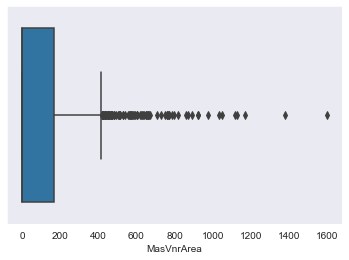

In [256]:
sns.boxplot(df_property["MasVnrArea"])

In [271]:
df_property["MasVnrArea"] = df_property["MasVnrArea"].fillna(df_property["MasVnrArea"].median())
df_property["MasVnrArea"]

0        196.0
1          0.0
2        162.0
3          0.0
4        350.0
5          0.0
6        186.0
7        240.0
8          0.0
9          0.0
10         0.0
11       286.0
12         0.0
13       306.0
14       212.0
15         0.0
16       180.0
17         0.0
18         0.0
19         0.0
20       380.0
21         0.0
22       281.0
23         0.0
24         0.0
25       640.0
26         0.0
27       200.0
28         0.0
29         0.0
30         0.0
31         0.0
32         0.0
33         0.0
34       246.0
35       132.0
36         0.0
37       650.0
38         0.0
39         0.0
40       101.0
41         0.0
42         0.0
43         0.0
44         0.0
45       412.0
46         0.0
47         0.0
48         0.0
49         0.0
50         0.0
51         0.0
52         0.0
53         0.0
54         0.0
55       272.0
56       456.0
57         0.0
58      1031.0
59         0.0
60         0.0
61         0.0
62       178.0
63         0.0
64       573.0
65       344.0
66       2

In [274]:
#3.Lets change GarageYrBlt to 0

In [319]:
df_property["GarageYrBlt"] = df_property["GarageYrBlt"].fillna(0,inplace=True)

In [313]:
# Now check the coorelation between the numerical variables:

In [321]:
corr = df_property.corr()
corr

,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
Id,1.000000,-0.033226,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
LotArea,-0.033226,1.000000,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,-0.012713,0.014228,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.013788,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.103321,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,0.214103,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,0.111170,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,-0.002618,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.015415,0.260833,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,0.299475,0.281986,0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


In [323]:
#Plot heat map of the correlation matrix

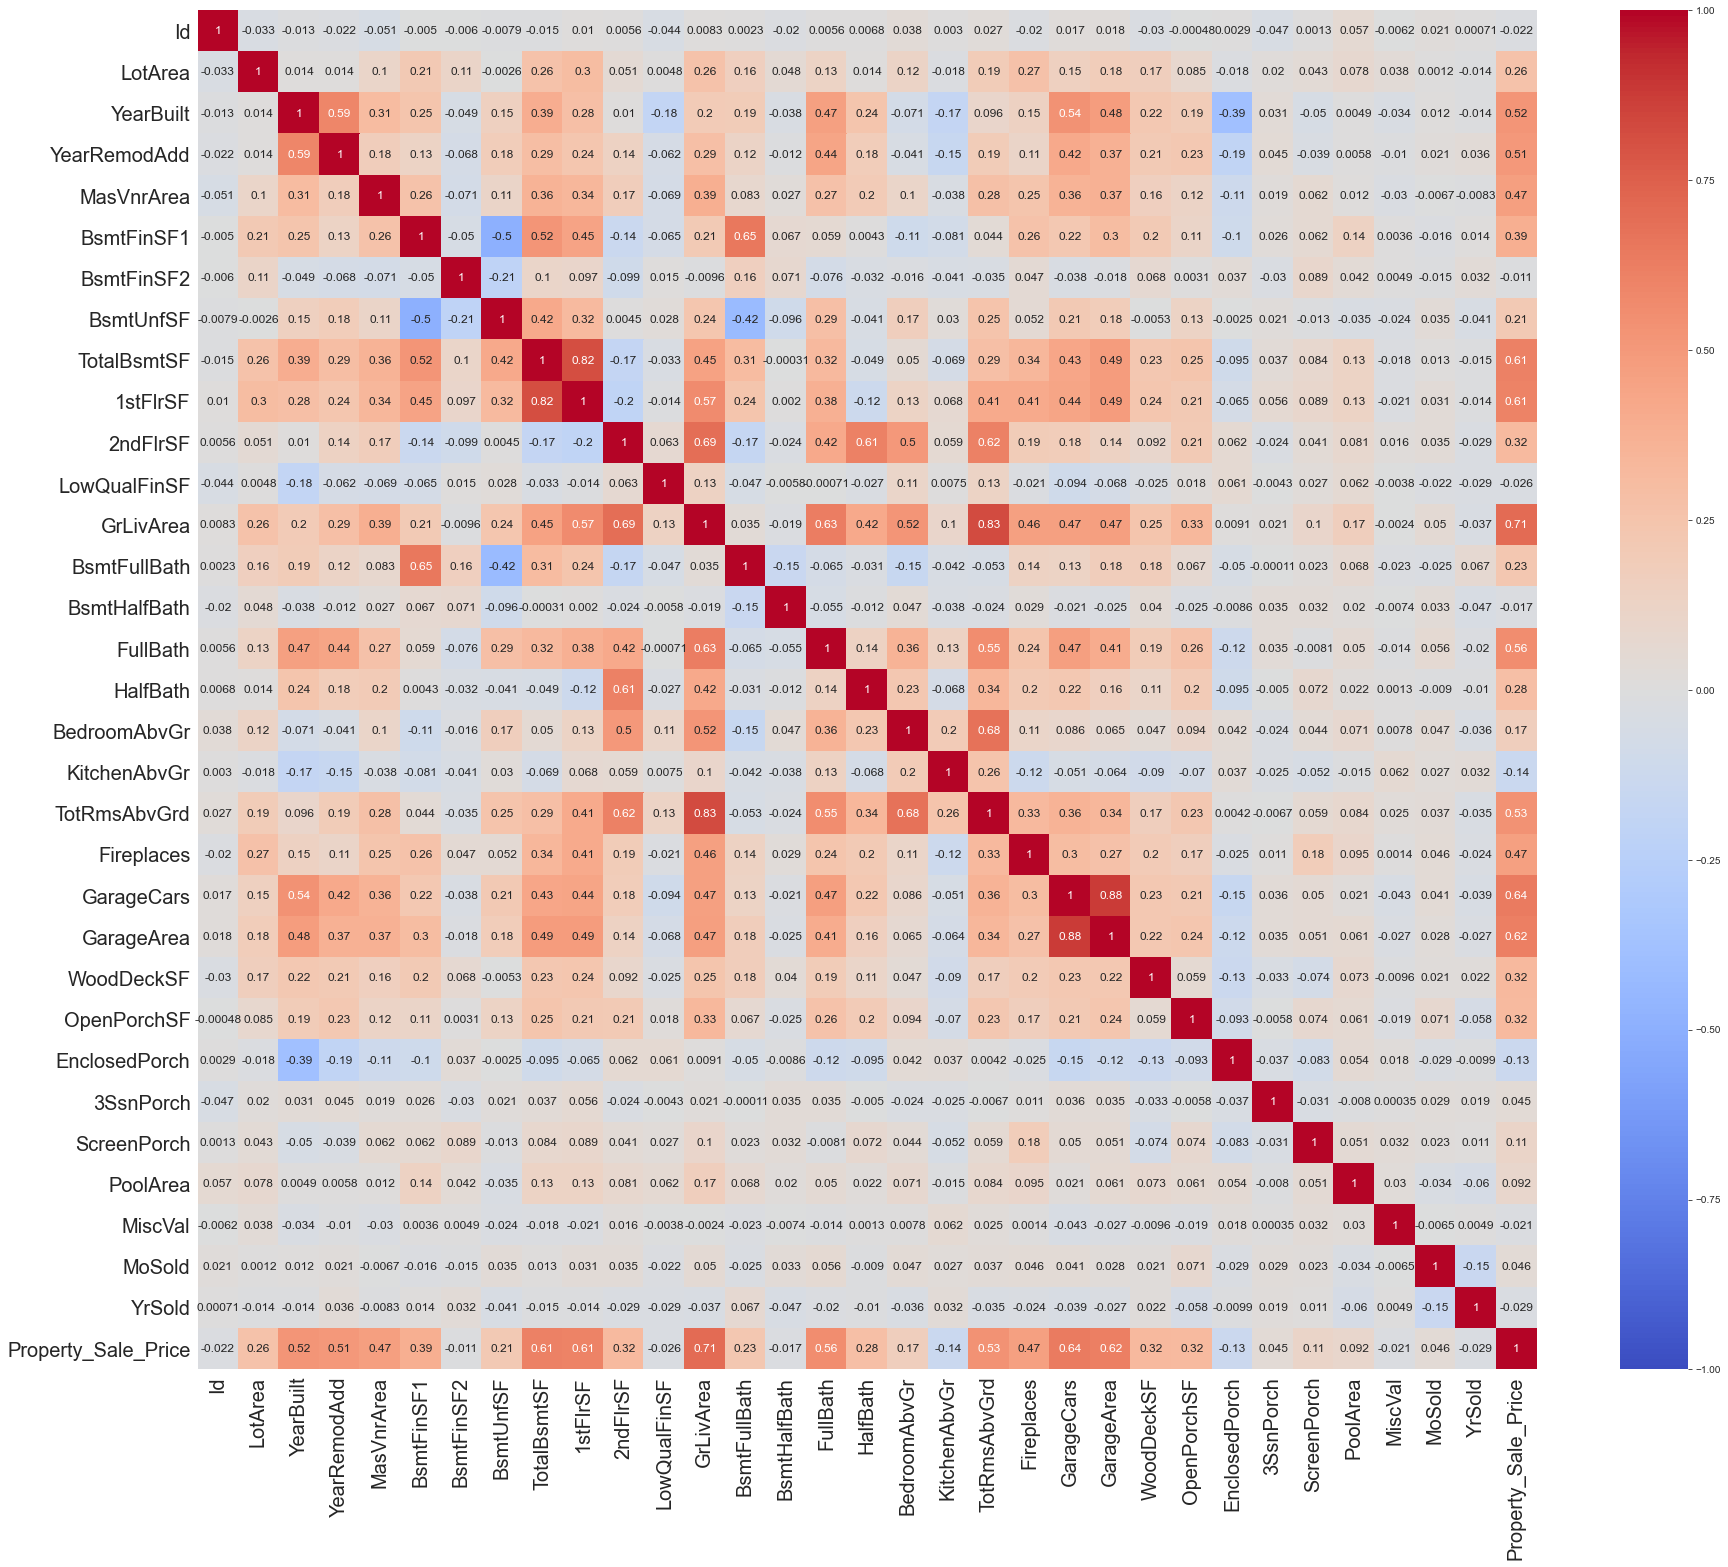

In [352]:
plt.figure(figsize=(30,25))

sns.heatmap(corr, vmin=-1, vmax=1,annot=True, cmap="coolwarm", annot_kws={"size":12})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

In [353]:
# DATA PREPARATION

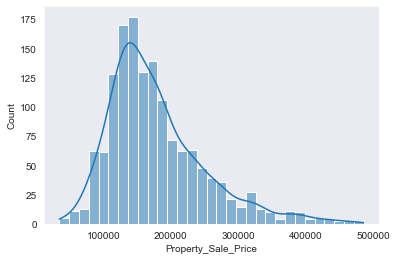

In [358]:
# check for normality

sns.histplot(df_property["Property_Sale_Price"],kde=1)
plt.show()

# shapiro wilk test

In [359]:
# SW test is used to analyse the target variable to check if the data is following NORMALITY or not. 

In [362]:
stat, p = shapiro(df_property["Property_Sale_Price"])
print(stat , p)

alpha = 0.5

if p > alpha:
    print("Normal distribution", p)
else:
    print("No normal distribution", p)

0.9194375872612 3.8813736096142395e-27
No normal distribution 3.8813736096142395e-27


In [363]:
df_property["log_Property_Sale_Price"] = np.log(df_property["Property_Sale_Price"])

In [365]:
df_property.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No FireplaceQu,Attchd,None,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,None,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,No Fence,None,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,None,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,No Fence,None,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,None,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,None,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,No Fence,None,0,12,2008,WD,Normal,250000,12.429216


In [450]:
df_property[["log_Property_Sale_Price","Property_Sale_Price"]].describe()

,log_Property_Sale_Price,Property_Sale_Price
count,1451.000000,1451.000000
mean,12.016082,178272.872502
std,0.387473,71891.119458
min,10.460242,34900.000000
25%,11.774520,129900.000000
50%,11.998433,162500.000000
75%,12.269047,213000.000000
max,13.091904,485000.000000


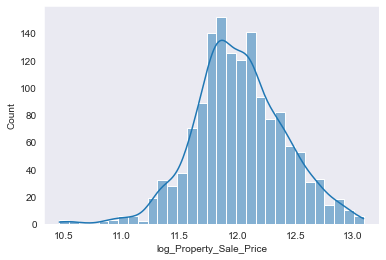

In [370]:
sns.histplot(df_property["log_Property_Sale_Price"], kde=1)
plt.show()

In [464]:
df_property["Property_Sale_Price"].skew()

1.2080022811555442

In [377]:
stat, p = shapiro(df_property["log_Property_Sale_Price"])

print("stat = %.3f, p-value=%.3f" %(stat,p))

alpha = 0.05

if p >alpha:
    print("No normal dist", p)
else:
    print("Normal dist", p)

stat = 0.992, p-value=0.000
Normal dist 9.535731919640966e-07


In [375]:
df_property["log_Property_Sale_Price"].skew()

-0.03836503763294778

<AxesSubplot:xlabel='log_Property_Sale_Price', ylabel='Count'>

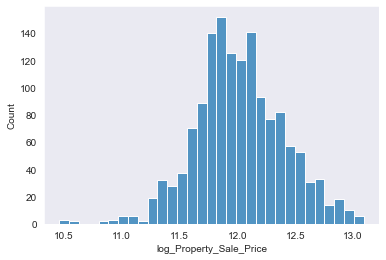

In [462]:
sns.histplot(df_property["log_Property_Sale_Price"])

In [463]:
df_property["log_Property_Sale_Price"].skew()

-0.03836503763294778

In [459]:
stats, p=shapiro(df_property["log_Property_Sale_Price"])


alpha = 0.05

if p> alpha:
    print("we fail to reject the null hypotheses", p)
else:
    print("We reject the null hypotheses", p)


We reject the null hypotheses 9.535731919640966e-07


#DUMMY ENCODING

In [492]:
df_numeric_data = df_property.select_dtypes(include = np.number)
df_categ_data = df_property.select_dtypes(include = object)

In [491]:
df_numeric_data = df_property.select_dtypes(include = np.number)

In [384]:
df_categ_data.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'Road_Type', 'Alley',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [383]:
df_categ_data.shape

(1451, 48)

In [493]:
df_numeric_data

,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price
0,1,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694
1,2,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011
2,3,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167
3,4,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398
4,5,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000,12.072541
1456,1457,13175,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000,12.254863
1457,1458,9042,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500,12.493130
1458,1459,9717,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010,142125,11.864462


In [469]:
dummy_encoded_var = pd.get_dummies(df_categ_data,drop_first=True)

In [489]:
dummy_encoded_var

,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,LotFrontage_80.0,LotFrontage_68.0,LotFrontage_60.0,LotFrontage_84.0,LotFrontage_85.0,LotFrontage_75.0,"LotFrontage_<bound method NDFrame._add_numeric_operations.<locals>.median of 0 65.0\n1 80.0\n2 68.0\n3 60.0\n4 84.0\n ... \n1455 62.0\n1456 85.0\n1457 66.0\n1458 68.0\n1459 75.0\nName: LotFrontage, Length: 1460, dtype: float64>",LotFrontage_51.0,LotFrontage_50.0,LotFrontage_70.0,LotFrontage_91.0,LotFrontage_72.0,LotFrontage_66.0,LotFrontage_101.0,LotFrontage_57.0,LotFrontage_44.0,LotFrontage_110.0,LotFrontage_98.0,LotFrontage_47.0,LotFrontage_108.0,LotFrontage_112.0,LotFrontage_74.0,LotFrontage_115.0,LotFrontage_61.0,LotFrontage_48.0,LotFrontage_33.0,LotFrontage_52.0,LotFrontage_100.0,LotFrontage_24.0,LotFrontage_89.0,LotFrontage_63.0,LotFrontage_76.0,LotFrontage_81.0,LotFrontage_95.0,LotFrontage_69.0,LotFrontage_21.0,LotFrontage_32.0,LotFrontage_78.0,LotFrontage_121.0,LotFrontage_122.0,LotFrontage_40.0,LotFrontage_105.0,LotFrontage_73.0,LotFrontage_77.0,LotFrontage_64.0,LotFrontage_94.0,LotFrontage_34.0,LotFrontage_90.0,LotFrontage_55.0,LotFrontage_88.0,LotFrontage_82.0,LotFrontage_71.0,LotFrontage_120.0,LotFrontage_107.0,LotFrontage_92.0,LotFrontage_134.0,LotFrontage_62.0,LotFrontage_86.0,LotFrontage_141.0,LotFrontage_97.0,LotFrontage_54.0,LotFrontage_41.0,LotFrontage_79.0,LotFrontage_174.0,LotFrontage_99.0,LotFrontage_67.0,LotFrontage_83.0,LotFrontage_43.0,LotFrontage_103.0,LotFrontage_93.0,LotFrontage_30.0,LotFrontage_129.0,LotFrontage_140.0,LotFrontage_35.0,LotFrontage_37.0,LotFrontage_118.0,LotFrontage_87.0,LotFrontage_116.0,LotFrontage_150.0,LotFrontage_111.0,LotFrontage_49.0,LotFrontage_96.0,LotFrontage_59.0,LotFrontage_36.0,LotFrontage_56.0,LotFrontage_102.0,LotFrontage_58.0,LotFrontage_38.0,LotFrontage_109.0,LotFrontage_130.0,LotFrontage_53.0,LotFrontage_137.0,LotFrontage_45.0,LotFrontage_106.0,LotFrontage_42.0,LotFrontage_39.0,LotFrontage_104.0,LotFrontage_144.0,LotFrontage_114.0,LotFrontage_128.0,LotFrontage_149.0,LotFrontage_313.0,LotFrontage_168.0,LotFrontage_182.0,LotFrontage_138.0,LotFrontage_152.0,LotFrontage_124.0,LotFrontage_153.0,LotFrontage_46.0,Road_Type_Pave,Alley_No Alley,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterio

In [472]:
dummy_encoded_var.shape

(1451, 363)

In [496]:
df_property_dummy = pd.concat([df_numeric_data,dummy_encoded_var], axis=1)

In [497]:
df_property_dummy

,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,LotFrontage_80.0,LotFrontage_68.0,LotFrontage_60.0,LotFrontage_84.0,LotFrontage_85.0,LotFrontage_75.0,"LotFrontage_<bound method NDFrame._add_numeric_operations.<locals>.median of 0 65.0\n1 80.0\n2 68.0\n3 60.0\n4 84.0\n ... \n1455 62.0\n1456 85.0\n1457 66.0\n1458 68.0\n1459 75.0\nName: LotFrontage, Length: 1460, dtype: float64>",LotFrontage_51.0,LotFrontage_50.0,LotFrontage_70.0,LotFrontage_91.0,LotFrontage_72.0,LotFrontage_66.0,LotFrontage_101.0,LotFrontage_57.0,LotFrontage_44.0,LotFrontage_110.0,LotFrontage_98.0,LotFrontage_47.0,LotFrontage_108.0,LotFrontage_112.0,LotFrontage_74.0,LotFrontage_115.0,LotFrontage_61.0,LotFrontage_48.0,LotFrontage_33.0,LotFrontage_52.0,LotFrontage_100.0,LotFrontage_24.0,LotFrontage_89.0,LotFrontage_63.0,LotFrontage_76.0,LotFrontage_81.0,LotFrontage_95.0,LotFrontage_69.0,LotFrontage_21.0,LotFrontage_32.0,LotFrontage_78.0,LotFrontage_121.0,LotFrontage_122.0,LotFrontage_40.0,LotFrontage_105.0,LotFrontage_73.0,LotFrontage_77.0,LotFrontage_64.0,LotFrontage_94.0,LotFrontage_34.0,LotFrontage_90.0,LotFrontage_55.0,LotFrontage_88.0,LotFrontage_82.0,LotFrontage_71.0,LotFrontage_120.0,LotFrontage_107.0,LotFrontage_92.0,LotFrontage_134.0,LotFrontage_62.0,LotFrontage_86.0,LotFrontage_141.0,LotFrontage_97.0,LotFrontage_54.0,LotFrontage_41.0,LotFrontage_79.0,LotFrontage_174.0,LotFrontage_99.0,LotFrontage_67.0,LotFrontage_83.0,LotFrontage_43.0,LotFrontage_103.0,LotFrontage_93.0,LotFrontage_30.0,LotFrontage_129.0,LotFrontage_140.0,LotFrontage_35.0,LotFrontage_37.0,LotFrontage_118.0,LotFrontage_87.0,LotFrontage_116.0,LotFrontage_150.0,LotFrontage_111.0,LotFrontage_49.0,LotFrontage_96.0,LotFrontage_59.0,LotFrontage_36.0,LotFrontage_56.0,LotFrontage_102.0,LotFrontage_58.0,LotFrontage_38.0,LotFrontage_109.0,LotFrontage_130.0,LotFrontage_53.0,LotFrontage_137.0,LotFrontage_45.0,LotFrontage_106.0,LotFrontage_42.0,LotFrontage_39.0,LotFrontage_104.0,LotFrontage_144.0,LotFrontage_114.0,LotFrontage_128.0,LotFrontage_149.0,LotFrontage_313.0,LotFrontage_168.0,LotFrontage_182.0,LotFrontage_138.0,LotFrontage_152.0,LotFrontage_124.0,LotFrontage_153.0,LotFrontage_46.0,Road_Type_Pave,Alley_No Alley,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,Overa

In [420]:
# Use OLS Regression Model

In [442]:
df_dummy = sm.add_constant(df_dummy)

In [441]:
X = df_dummy.drop(["Property_Sale_Price","log_Property_Sale_Price"], axis=1)
Y = df_dummy[["Property_Sale_Price","log_Property_Sale_Price"]]

In [438]:
X_train, Y_train, X_test, Y_test = train_test_split(X,Y,test_size=0.3, random_state=1)
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",Y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",Y_test.shape)

The shape of X_train is: (1015, 395)
The shape of X_test is: (1015, 2)
The shape of y_train is: (436, 395)
The shape of y_test is: (436, 2)


In [439]:
# BUILDING MODEL USING SM.OLS

In [445]:
liner_reg_logmodel = sm.OLS(Y_train['log_Property_Sale_Price'], X_train).fit()

KeyError: 'log_Property_Sale_Price'